In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import gym

env = gym.make("LunarLander-v2-mo", render_mode="rgb_array")
env_learning = gym.make("LunarLander-v2-mo")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000
train_start = max_memory_size
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=1000, use_clipping=use_clipping, clipping_tol=clipping_tol)


c:\Python39\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


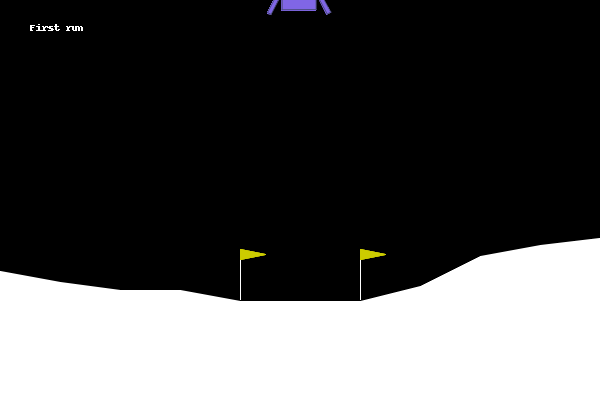

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [4]:
from IPython.display import Image as IpyImg

NUM_EPISODES = 500
REPLAY_FREQUENCY=8
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []

def early_stopping(reward:list)-> bool:
    #if sum(reward) >= 200:
    if reward[1] > 1:
        return True
    return False

THRESHOLD_EXCEEDED_CONSECUTIVELY = 2

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env_learning,episodes=NUM_EPISODES, replay_frequency=REPLAY_FREQUENCY, 
                                                            mname=mname, verbose=True, early_stopping=early_stopping,
                                                            THRESHOLD_EXCEEDED_CONSECUTIVELY=THRESHOLD_EXCEEDED_CONSECUTIVELY)


#for i in range(HOW_MANY_ITERATIONS):
#    rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=False)
#    total_rewards += rewards
#    total_avg_rewards += avg_rewards
#    total_timings += timings
#    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
#    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
#    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

20:16:01	Episode	1	timesteps:	66	Took	1.532009 sec - reward:	[68.23855903834323, -100.0, -6.329999999999998]	| 100AvgReward: [68.23855903834323, -100.0, -6.329999999999998]
20:16:01	Episode	2	timesteps:	107	Took	0.32199 sec - reward:	[-30.40067468899099, -100.0, -6.779999999999999]	| 100AvgReward: [18.91894217467612, -100.0, -6.554999999999999]
20:16:01	Episode	3	timesteps:	98	Took	0.268245 sec - reward:	[117.21372944827996, -100.0, -7.769999999999999]	| 100AvgReward: [51.6838712658774, -100.0, -6.959999999999998]
20:16:01	Episode	4	timesteps:	91	Took	0.245016 sec - reward:	[56.264350773080324, -100.0, -7.05]	| 100AvgReward: [52.828991142678134, -100.0, -6.982499999999999]
20:16:02	Episode	5	timesteps:	98	Took	0.270001 sec - reward:	[-73.8404749291652, -100.0, -7.1400000000000015]	| 100AvgReward: [27.49509792830947, -100.0, -7.014]
20:16:02	Episode	6	timesteps:	141	Took	0.421985 sec - reward:	[90.5074179949651, -100.0, -14.75999999999999]	| 100AvgReward: [37.99715127275207, -100.0, -8.

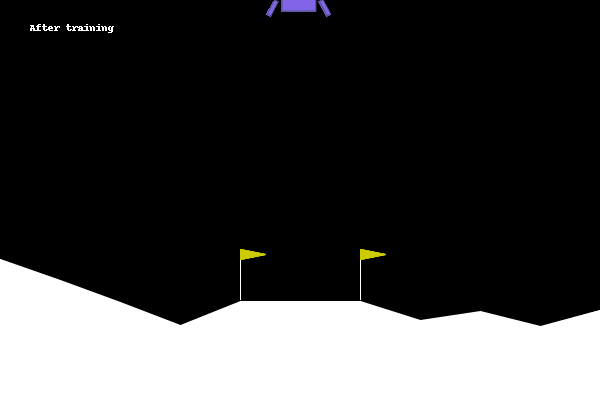

In [5]:
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="After training", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

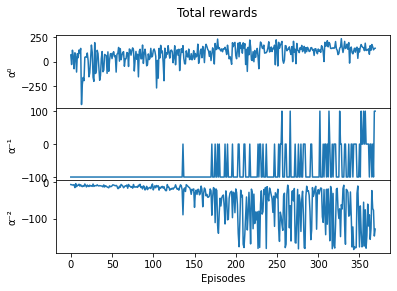

In [6]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(rewards, len(rewards), "Total rewards")

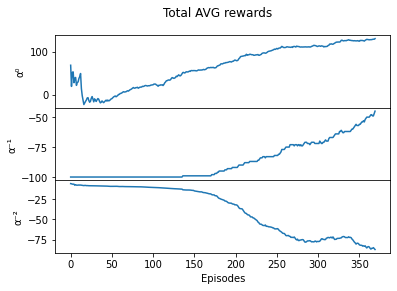

In [7]:
r = Ban.display_plot(avg_rewards, len(avg_rewards), "Total AVG rewards")